In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2

Custom kNN algorithm implementation using `car.csv` dataset from [Kaggle](https://www.kaggle.com/elikplim/car-evaluation-data-set).

In [2]:
data = pd.read_csv("data/raw/car.csv", dtype = "category", header = None)
data.columns = ["buying", "maint", "doors", "persons", "lug-boot", "safety", "accept"]

print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug-boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Use the `train_test_split` method (use the documentation) to divide the data into 75% training and 25% testing data. Use parameter random_state = 0 to set the same random seed and ensure that we all get the same results.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['accept'], test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1296, 6) (432, 6) (1296,) (432,)


In [4]:
#View value counts for each category (class) of labels (classes)
data.accept.value_counts()

accept
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [5]:
def accuracy(actual, predicted):
  return sum(actual == predicted) / len(predicted)

In [6]:
from src.knn import KNearestNeighbour

model = KNearestNeighbour(X_train, y_train)
predictions = model.fit_predict(X_test, k = 1)
accuracy(y_test, predictions)

0.7546296296296297

Now try different values for k, for example $(1,3,...,19)$ and plot the resulting accuracies (on y-axis) with respect to the values of $k$ (on x-axis).

Text(0, 0.5, 'accuracy')

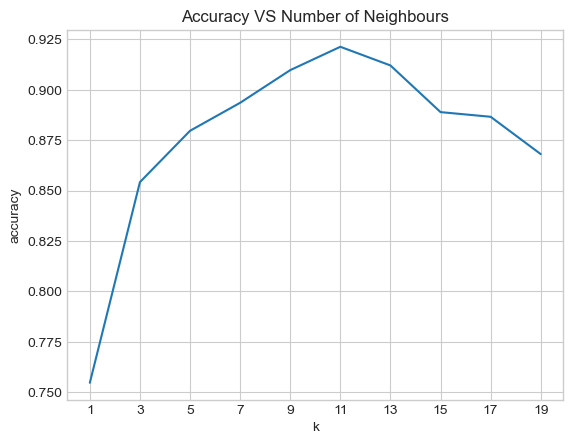

In [7]:
accuracies = []
k_values = range(1, 20, 2)
for k in k_values:
  model = KNearestNeighbour(X_train, y_train)
  predictions = model.fit_predict(X_test, k=k)
  accuracies.append(accuracy(y_test, predictions))
  
plt.plot(k_values, accuracies)
plt.title('Accuracy VS Number of Neighbours')
plt.xlabel('k')
plt.xticks(range(1, 20, 2))
plt.ylabel('accuracy')

## Comparing with `scikit-learn`'s implementation

For `sklearn`'s implementation the data should be converted to numeric.

In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data1 = enc.fit_transform(data)

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1[:, :-1], data1[:, -1], test_size=0.25, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=1, metric='hamming')
model1.fit(X_train1, y_train1)
predictions1 = model1.predict(X_test1)
accuracy(y_test1, predictions1)

0.7777777777777778

Sklearn's implementation is different because it uses optimized algorithms and [tree data-structures](https://www.geeksforgeeks.org/k-dimensional-tree/) (read more about those approaches [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)). We can still reproduce our result by setting the `algorithm` parameter to `brute`, which stands for the *brute-force* method.

In [11]:
model2 = KNeighborsClassifier(n_neighbors=1, metric='hamming', algorithm='brute')
model2.fit(X_train1, y_train1)
predictions2 = model2.predict(X_test1)
accuracy(y_test1, predictions2)

0.7546296296296297